In [21]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization
 
import matplotlib.pyplot as plt
import numpy as np

In [22]:
np.random.seed(1000)

In [23]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11),\
 strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer (Fully Connected Layer)
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(32, 32, 3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 96)          384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 256)        

In [24]:
# COmpiling the model
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [26]:
X_test.shape

(10000, 32, 32, 3)

In [27]:
#Train-validation-test split

#from sklearn.model_selection import train_test_split
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.3)

X_val, y_val = X_train [:5000], y_train [:5000]
X_train, y_train = X_train[5000:], y_train[5000:]

In [28]:
X_train.shape

(45000, 32, 32, 3)

In [29]:
#Dimension of the CIFAR10 dataset

print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))
print((X_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 1))
((5000, 32, 32, 3), (5000, 1))
((10000, 32, 32, 3), (10000, 1))


In [30]:
#Onehot Encoding the labels.

from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

In [31]:
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [32]:
#Verifying the dimension after one hot encoding

print((X_train.shape,y_train.shape))
print((X_val.shape,y_val.shape))
print((X_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 10))
((5000, 32, 32, 3), (5000, 10))
((10000, 32, 32, 3), (10000, 10))


In [33]:
#Image Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

In [34]:
#Fitting the augmentation defined above to the data

train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [35]:
#Learning Rate Annealer
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor="val_loss", patience=1)
from tensorflow.keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [ ]:
#Defining the parameters

batch_size= 100
epochs=100
learn_rate=.001

In [ ]:
history = model.fit(train_generator.flow(X_train, y_train, batch_size=32),
                    epochs = 100,
                    batch_size = 64,
                    validation_data = val_generator.flow(X_val, y_val, batch_size=32),
                    callbacks=[ES], verbose = 0)

In [ ]:
# Train the model
# model.fit_generator(X_train, y_train, epochs=1000, batch_size={{choice([10, 32, 64, 128])}}, validation_split=0.2, callbacks=[ES])# 

model.fit(train_generator.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch= X_train.shape[0]//batch_size, epochs=epochs, validation_data=val_generator.flow(X_val, y_val, batch_size=batch_size), validation_steps= 25# 0,
      callbacks=[ES], verbose=1)

In [ ]:
# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

# import cnn_utils as utils
# from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,100+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

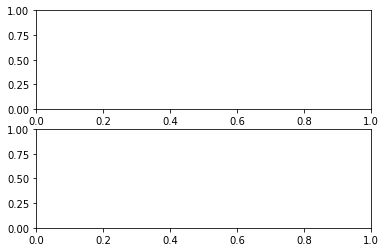

In [ ]:
#After successful training, we will visualize its performance.
#Plotting the training and validation loss

# f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

No handles with labels found to put in legend.


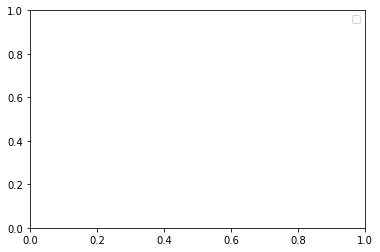

In [ ]:
#Assigning the first subplot to graph training loss and validation loss

# ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
# ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

# #Plotting the training accuracy and validation accuracy
# ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
# ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

# plt.legend()

In [ ]:
#Defining function for confusion matrix plot

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


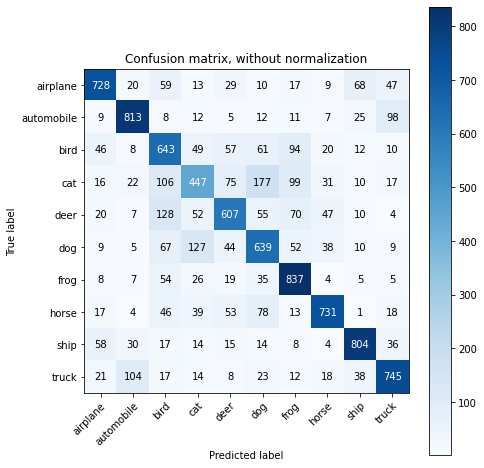

In [ ]:
#Making prediction

y_pred=model.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix

plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


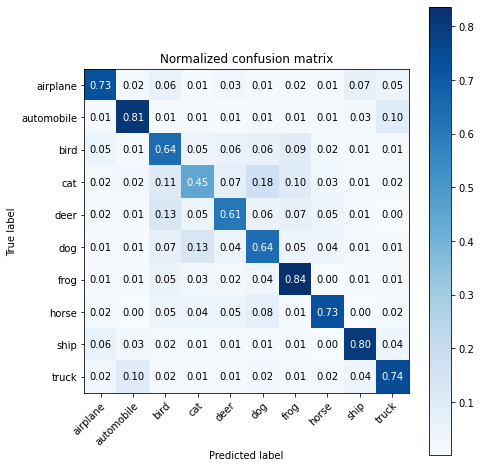

In [ ]:
# Plotting normalized confusion matrix

plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [ ]:
#Classification accuracy

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.6994
